In [2]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.utils.np_utils import to_categorical
import cv2


Using TensorFlow backend.


# 도형 준비

In [2]:
# mnist    60000x28x28 처럼 만든다.    label은 1차원

X_train = np.zeros((15*3, 24,24))
y_train = np.zeros(15*3)

for i in range(15) :    
    img = cv2.imread('hard_handwriting_shape/train/circle/circle{0:03d}.png'.format(i+1), 0)        
    X_train[i,:,:] = img
    y_train[i] = 0
    
for i in range(15) :    
    img = cv2.imread('hard_handwriting_shape/train/rectangle/rectangle{0:03d}.png'.format(i+1), 0)        
    X_train[15+i,:,:] = img
    y_train[15+i] = 1
    
for i in range(15) :    
    img = cv2.imread('hard_handwriting_shape/train/triangle/triangle{0:03d}.png'.format(i+1), 0)        
    X_train[30+i,:,:] = img
    y_train[30+i] = 2      

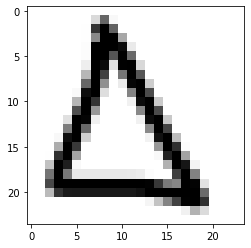

Label:  2.0


In [3]:
plt.imshow(X_train[44], cmap="gray")    # show first number in the dataset
plt.show()
print('Label: ', y_train[44])

In [4]:
# mnist    60000x28x28 처럼 만든다.    label은 1차원

X_test = np.zeros((5*3, 24,24))
y_test = np.zeros(5*3)

for i in range(5) :    
    img = cv2.imread('hard_handwriting_shape/test_easy/circle/circle{0:03d}.png'.format(i+16), 0)        
    X_test[i,:,:] = img
    y_test[i] = 0
    
for i in range(5) :    
    img = cv2.imread('hard_handwriting_shape/test_easy/rectangle/rectangle{0:03d}.png'.format(i+16), 0)        
    X_test[5+i,:,:] = img
    y_test[5+i] = 1
    
for i in range(5) :    
    img = cv2.imread('hard_handwriting_shape/test_easy/triangle/triangle{0:03d}.png'.format(i+16), 0)        
    X_test[10+i,:,:] = img
    y_test[10+i] = 2

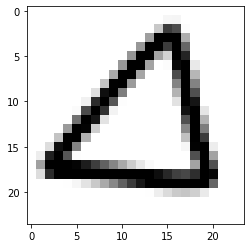

Label:  2.0


In [5]:
plt.imshow(X_test[14], cmap="gray")    # show first number in the dataset
plt.show()
print('Label: ', y_test[14])

In [6]:
# reshaping X data: (n, 28, 28) => (n, )
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))
print(X_train.shape)
print(X_test.shape)

(45, 576)
(15, 576)


In [7]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(45, 576) (15, 576) (45, 3) (15, 3)


# DNN 학습

In [8]:
model = Sequential()
model.add(Dense(50, input_shape = (576, )))
model.add(BatchNormalization())
model.add(Activation('relu'))   #relu, sigmoid
model.add(Dropout(0.2))         
model.add(Dense(50))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))         
model.add(Dense(50))
model.add(BatchNormalization())
model.add(Activation('relu'))       # activatin 전에 batch  후에 dropout
model.add(Dropout(0.2))         
model.add(Dense(3))
model.add(Activation('softmax'))   # soft max에는 적용하지 않는다.
model.compile(optimizer = "adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])


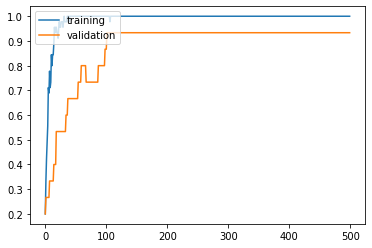

In [9]:
# 모델 새로 생성하지 않으면 weight 초기화 되지 않는다. 대야한 network 구성해 본다.
# 여러번 해볼 필요가 있다. 
history = model.fit(X_train, y_train, batch_size = 256, validation_data =(X_test, y_test), epochs = 500, verbose = 0)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [10]:
results = model.evaluate(X_test, y_test)
print(results)

15/15 [==============================] - 0s 113us/step
[0.16173020005226135, 0.9333333373069763]


# CNN 학습


- 데이터는 기존 2차원 -> 4차원 이어야 한다.
- 레이블은 변화 없다.
- (45, 24, 24, 1)
- (15, 24, 24, 1)
- (45, 10)
- (15, 10)
-  2차원을 3차원으로 reshape하고, 다시 4차원으로 확장 필요. 어렵다.
- 이미지 읽는 코드 다시 실행시킨다.


##  이미지 다시 읽어서 재구성

In [45]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))  # 갯수, w, h, 1
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))  # 갯수, w, h, 1


IndexError: tuple index out of range

In [96]:
# 위에서 코드 실행하면 1차원 으로 바뀐다.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [98]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(45, 24, 24, 1)
(15, 24, 24, 1)
(45, 3)
(15, 3)


## reshape을 통해 재구성

In [ ]:
a= np.array([ [1,2,3,4] , [5,6,7,8], [9,10,11,12]    ])
print(a.shape)
b = a.reshape(-1,2,2)
print(b.shape)

bb = X_train.copy()
cc = bb.reshape(-1, 24,24)
print(cc.shape)
plt.imshow(cc[44], cmap="gray")    # show first number in the dataset
plt.show()

In [11]:
# 4차원으로 변경
X_train =  X_train.reshape(-1, 24,24,1)
X_test =  X_test.reshape(-1, 24,24,1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(45, 24, 24, 1)
(15, 24, 24, 1)
(45, 3)
(15, 3)


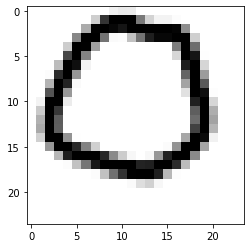

In [12]:
plt.imshow(X_train[2,:,:,0], cmap="gray")  
plt.show()

In [13]:
# 모델 구성하기
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(24,24,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
    
model.add(Conv2D(64, (3, 3)))  # 이렇게 하면 batch normalization 못쓴다.
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128))                         # flat 이 후는 안함
model.add(Activation('relu'))
model.add(Dense(3, activation='softmax'))

# 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# 모델 학습시키기 #1
history = model.fit(X_train, y_train, batch_size = 15, epochs = 100, validation_data =(X_test, y_test), verbose = 0)

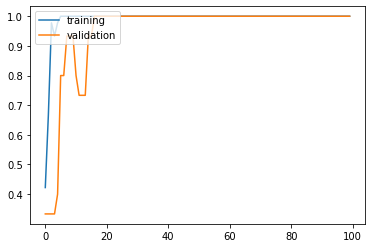

15/15 [==============================] - 0s 111us/step
[0.00052188168046996, 1.0]


In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()
results = model.evaluate(X_test, y_test)
print(results)

# 여러운 shape으로 해보기

In [16]:
# mnist    60000x28x28 처럼 만든다.    label은 1차원

X_test = np.zeros((5*3, 24,24))
y_test = np.zeros(5*3)

for i in range(5) :        
    img = cv2.imread('hard_handwriting_shape/test/circle/circle{0:03d}.png'.format(i+21), 0)        
    X_test[i,:,:] = img
    y_test[i] = 0
    
for i in range(5) :    
    img = cv2.imread('hard_handwriting_shape/test/rectangle/rectangle{0:03d}.png'.format(i+21), 0)        
    X_test[5+i,:,:] = img
    y_test[5+i] = 1
    
for i in range(5) :    
    img = cv2.imread('hard_handwriting_shape/test/triangle/triangle{0:03d}.png'.format(i+21), 0)        
    X_test[10+i,:,:] = img
    y_test[10+i] = 2

In [17]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))  # 갯수, w, h, 1
y_test = to_categorical(y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(45, 24, 24, 1) (15, 24, 24, 1) (45, 3) (15, 3)


In [18]:
results = model.evaluate(X_test, y_test)
print(results)

15/15 [==============================] - 0s 168us/step
[13.70483112335205, 0.3333333432674408]


# 무엇이 문제 인지 분석한다

In [22]:
h = model.predict(X_test)
p = model.predict_classes(X_test)
labels = ['C', 'R', 'T']   

In [23]:
print(p)
y_ =  np.argmax(y_test, axis=1)
print(y_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


In [24]:
idx = np.where(  p != y_ )
print(idx)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),)


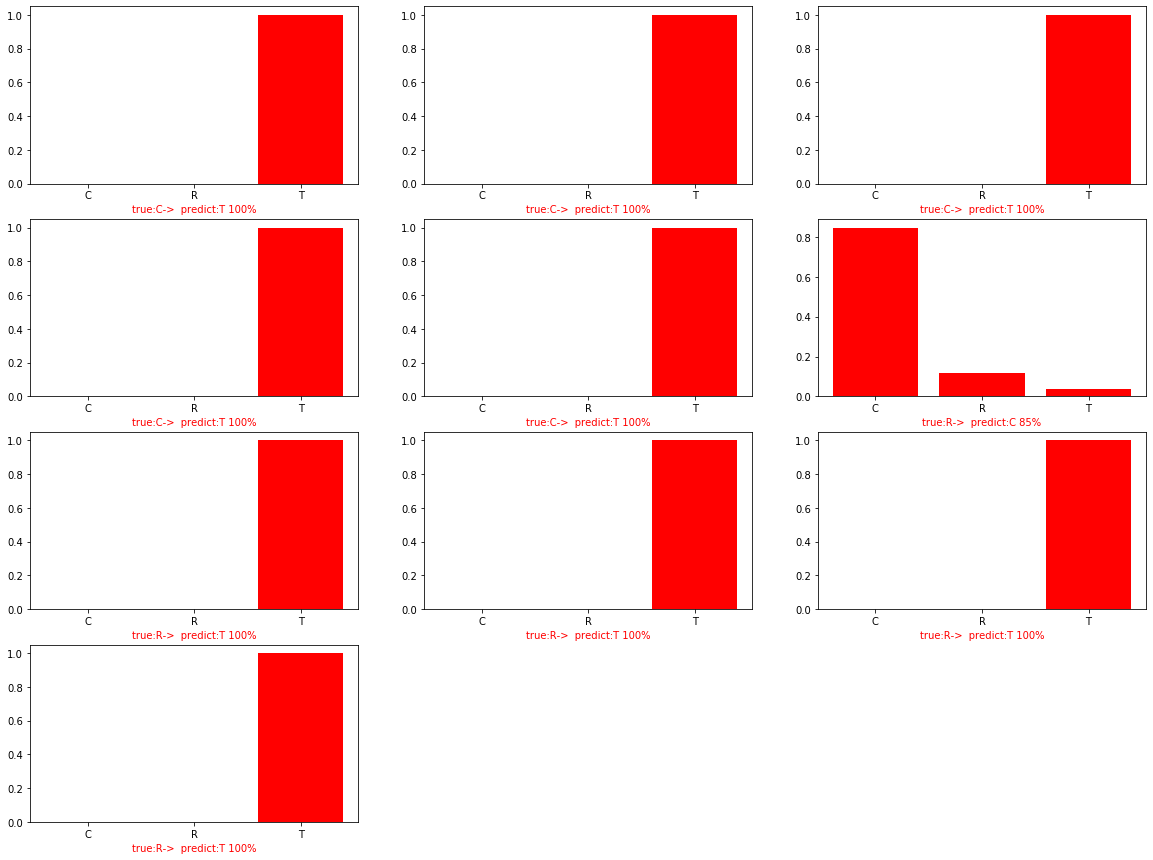

In [25]:
plt.figure(figsize=(20, 15))

cc = 3
rr = int(len(idx[0]) / cc)+1

for k in range( len(idx[0]) ) :        
  i = idx[0][k]             
  c =  "blue" if  p[i] == y_[i]   else "red"    
  plt.subplot( rr ,cc, k+1)
  plt.bar(labels, h[i], color=c)
  plt.xlabel("true:{}->  predict:{} {:2.0f}%".format(labels[int(y_[  i ])], labels[p[  i ]],  100*np.max(h[i], axis=0)),  color = c )

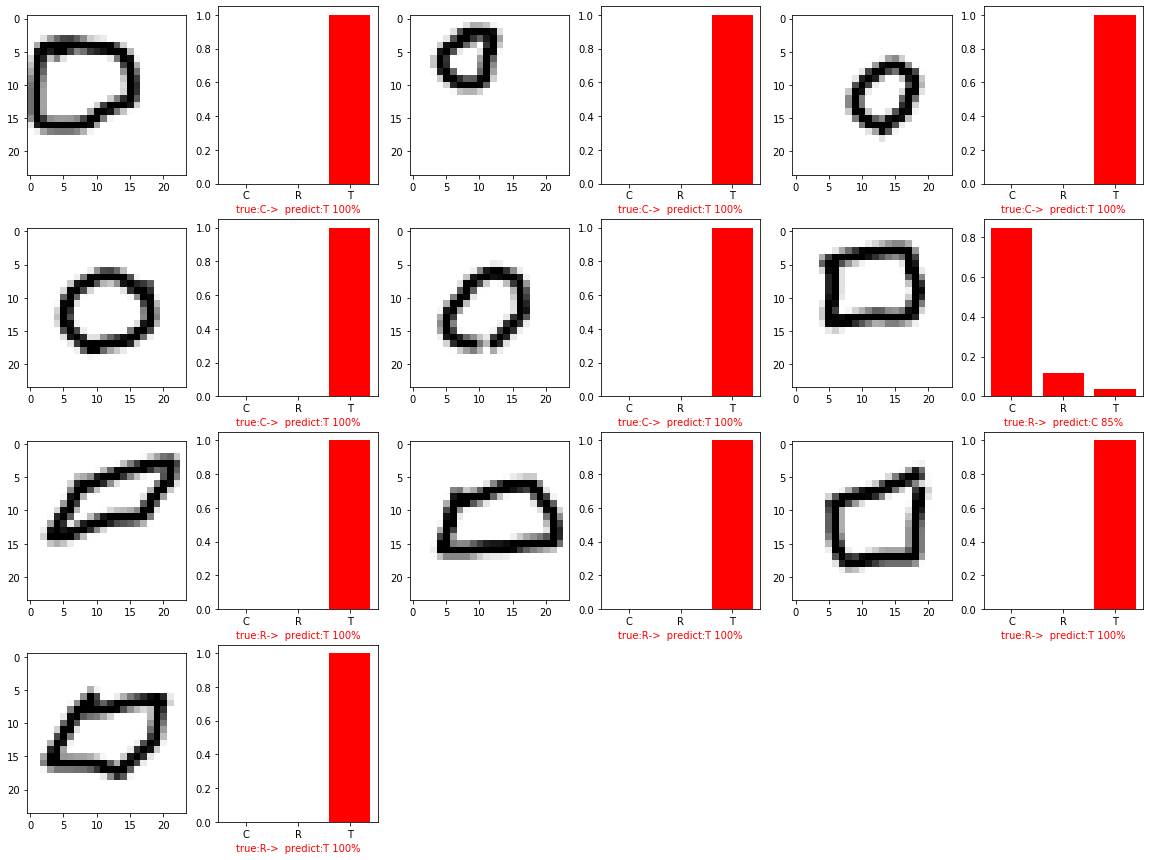

In [26]:
plt.figure(figsize=(20, 15))

cc = 3
rr = int(len(idx[0]) / cc)+1

for k in range( len(idx[0]) ) :        
  i = idx[0][k]             
  c =  "blue" if  p[i] == y_[i]   else "red"    
  plt.subplot( rr ,cc*2, k*2+1)    
  plt.imshow(X_test[i, :,:, 0], cmap="gray") 
  plt.subplot( rr ,cc*2, k*2+2)
  plt.bar(labels, h[i], color=c)
  plt.xlabel("true:{}->  predict:{} {:2.0f}%".format(labels[int(y_[  i ])], labels[p[  i ]],  100*np.max(h[i], axis=0)),  color = c )

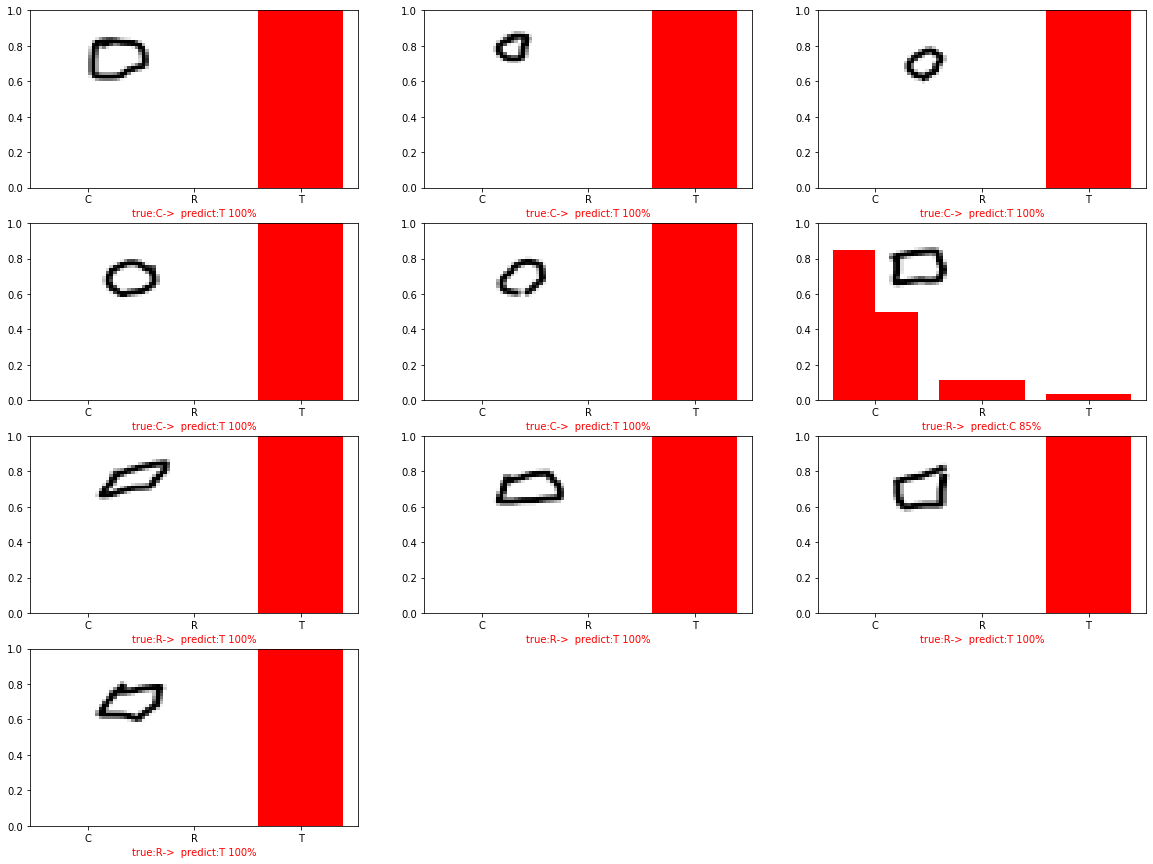

In [38]:
plt.figure(figsize=(20, 15))

cc = 3
rr = int(len(idx[0]) / cc)+1

for k in range( len(idx[0]) ) :        
  i = idx[0][k]             
  c =  "blue" if  p[i] == y_[i]   else "red"    
  plt.subplot( rr ,cc, k+1)
  #  left and right limits, and the bottom and top limits. 
  plt.imshow(X_test[i, :,:, 0], extent=[0, 0.8, 0.5, 0.9], aspect='auto', zorder=10, cmap="gray")
  plt.ylim(0.0, 1.0)  
  plt.bar(labels, h[i], color=c)
  plt.xlabel("true:{}->  predict:{} {:2.0f}%".format(labels[int(y_[  i ])], labels[p[  i ]],  100*np.max(h[i], axis=0)),  color = c )
    
plt.savefig('fig1.png')

# 데이터 부풀려서 개선하기

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


Epoch 1/200
1500/1500 [==============================] - 31s 21ms/step - loss: 0.2134 - accuracy: 0.9176 - val_loss: 3.0417 - val_accuracy: 0.8000
Epoch 2/200
1500/1500 [==============================] - 32s 22ms/step - loss: 0.0340 - accuracy: 0.9898 - val_loss: 1.4623e-05 - val_accuracy: 0.8000
Epoch 3/200
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0349 - accuracy: 0.9904 - val_loss: 0.0787 - val_accuracy: 0.8000
Epoch 4/200
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0225 - accuracy: 0.9927 - val_loss: 3.3247 - val_accuracy: 0.8000
Epoch 5/200
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0136 - accuracy: 0.9962 - val_loss: 5.4542 - val_accuracy: 0.7333
Epoch 6/200
1500/1500 [==============================] - 34s 22ms/step - loss: 0.0257 - accuracy: 0.9922 - val_loss: 5.3514e-04 - val_accuracy: 0.6667
Epoch 7/200
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0139 - accuracy: 0.9942 - val

KeyboardInterrupt: 

In [11]:
# 모델 평가하기
print("-- Evaluate --")

scores = model.evaluate_generator(
            test_generator, 
            steps = 5)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

# 모델 예측하기
print("-- Predict --")

output = model.predict_generator(
            test_generator, 
            steps = 5)

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(output)

-- Evaluate --
accuracy: 73.33%
-- Predict --
[[0.991 0.000 0.009]
 [0.016 0.983 0.001]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.000 0.356 0.644]
 [1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]]
